In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
data=load_iris()
X=pd.DataFrame(data.data ,columns=data.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
scalar=StandardScaler()
X_Scaled=scalar.fit_transform(X)
km=KMeans(n_clusters=3,init='k-means++')
z=km.fit(X_Scaled)

In [4]:
y_pred=km.fit_predict(X[['sepal length (cm)']],X[['petal width (cm)']])
y_pred

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [5]:
X['z']=y_pred
X.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

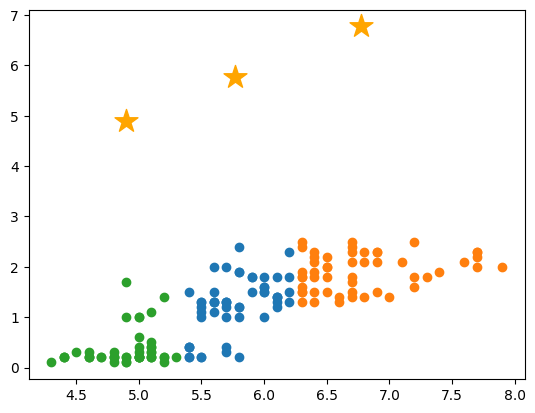

In [6]:
X1=X[X.z==0]
X2=X[X.z==1]
X3=X[X.z==2]
plt.scatter(X1[['sepal length (cm)']],X1[['petal width (cm)']])
plt.scatter(X2[['sepal length (cm)']],X2[['petal width (cm)']])
plt.scatter(X3[['sepal length (cm)']],X3[['petal width (cm)']])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,0],s=300,c='orange',marker='*',label='centroids')

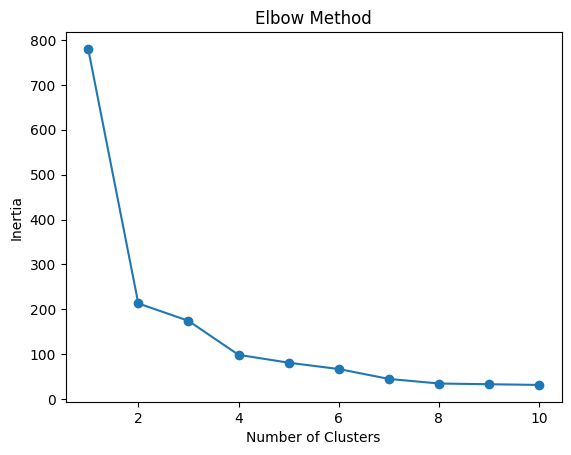

In [7]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()